## Summarize the history of Mooring Site (M2) - Mike Litzow

- mooring data pulled from ERDDAP (preliminary and/or final)   
- currently on downdraft
- goal is to evaluate 40-55m temp/sal


In [1]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter

import cmocean

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

import cmocean
### specify primary bulk figure parameters
fontsize = 10
labelsize = 10
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

In [3]:
server_url = 'http://downdraft.pmel.noaa.gov:8080/erddap'

Lets find all erddap datasets that would be associated with M2:   
    - bsm-2a, bs-2c, bsp-2a, bsp-2c, bsitaepr-2a

In [ ]:
e = ERDDAP(server=server_url)
df_1 = pd.read_csv(e.get_search_url(response='csv', search_for='bs2'))
e = ERDDAP(server=server_url)
df_2 = pd.read_csv(e.get_search_url(response='csv', search_for='bsm2'))
e = ERDDAP(server=server_url)
df_3 = pd.read_csv(e.get_search_url(response='csv', search_for='bsitae'))

df = pd.concat([df_1,df_2,df_3])
print(df['Dataset ID'].values)

In [27]:
from requests.exceptions import HTTPError

dfs = {}
for dataset_id in df['Dataset ID'].values:
    if ('final' in dataset_id):
        print(dataset_id)
        try:
            d = ERDDAP(server=server_url,
                protocol='tabledap',
                response='csv'
            )
            d.dataset_id=dataset_id
            
            d.variables = ['time','depth','salinity','temperature']
        except HTTPError:
            print('Failed to generate url {}'.format(dataset_id))

        try:
            df_m = d.to_pandas(
                        index_col='time (UTC)',
                        parse_dates=True,
                        skiprows=(1,)  # units information can be dropped.
                        )
            df_m.sort_index(inplace=True)
            df_m.columns = [x[1].split()[0] for x in enumerate(df_m.columns)]

            #-9999 and 1e35 are missing values... but erddap doesn't catch the -9999 yet 
            #and some 1e35 are off a bit
            df_m['depth'][(df_m.depth == -9999)] = np.nan # only in pressure field
            df_m['salinity'][(df_m.salinity >= 1e30)] = np.nan # 
            df_m['temperature'][(df_m.temperature >= 1e30)] = np.nan # 
            dfs.update({dataset_id:df_m})
        except:
            pass


datasets_Mooring_01bs2c_final
datasets_Mooring_02bs2c_final
datasets_Mooring_03bs2c_final
datasets_Mooring_04bs2c_final
datasets_Mooring_05bs2c_final
datasets_Mooring_06bs2c_final
datasets_Mooring_07bs2c_final
datasets_Mooring_08bs2c_final
datasets_Mooring_09bs2c_final
datasets_Mooring_10bs2c_final
datasets_Mooring_11bs2c_final
datasets_Mooring_12bs2c_final
datasets_Mooring_13bs2c_final
datasets_Mooring_14bs2c_final
datasets_Mooring_15bs2c_final
datasets_Mooring_16bs2c_final
datasets_Mooring_17bs2c_final
datasets_Mooring_18bs2c_final
datasets_Mooring_96bs2a_final
datasets_Mooring_96bs2b_final
datasets_Mooring_96bs2c_final
datasets_Mooring_97bs2a_final
datasets_Mooring_97bs2b_final
datasets_Mooring_97bs2c_final
datasets_Mooring_98bs2a_final
datasets_Mooring_98bs2b_final
datasets_Mooring_98bs2c_final
datasets_Mooring_99bs2a_final
datasets_Mooring_99bs2c_final
datasets_Mooring_00bsm2a_final
datasets_Mooring_01bsm2a_final
datasets_Mooring_02bsm2a_final
datasets_Mooring_03bsm2a_final
datase

plotting datasets_Mooring_01bs2c_final
plotting datasets_Mooring_02bs2c_final
plotting datasets_Mooring_03bs2c_final
plotting datasets_Mooring_04bs2c_final
plotting datasets_Mooring_05bs2c_final
plotting datasets_Mooring_06bs2c_final
plotting datasets_Mooring_07bs2c_final
plotting datasets_Mooring_08bs2c_final
plotting datasets_Mooring_09bs2c_final
plotting datasets_Mooring_10bs2c_final
plotting datasets_Mooring_11bs2c_final
plotting datasets_Mooring_12bs2c_final
plotting datasets_Mooring_13bs2c_final
plotting datasets_Mooring_14bs2c_final
plotting datasets_Mooring_15bs2c_final
plotting datasets_Mooring_16bs2c_final
plotting datasets_Mooring_17bs2c_final
plotting datasets_Mooring_18bs2c_final
plotting datasets_Mooring_96bs2a_final
plotting datasets_Mooring_96bs2b_final
plotting datasets_Mooring_96bs2c_final
plotting datasets_Mooring_97bs2a_final
plotting datasets_Mooring_97bs2b_final
plotting datasets_Mooring_97bs2c_final
plotting datasets_Mooring_98bs2a_final
plotting datasets_Mooring

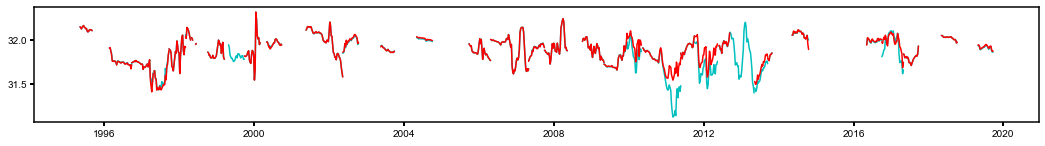

In [29]:
fig = plt.figure(1,figsize=(18,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
for dfn, df in dfs.items():
    print(f"plotting {dfn}")
    dft = df[(df.depth>=40) & (df.depth<=70)].resample('1W').mean()
    ax1.plot(dft.index, dft.salinity ,'c')
    dft = df[(df.depth>=40) & (df.depth<=55)].resample('1W').mean()
    ax1.plot(dft.index, dft.salinity ,'r')


plotting datasets_Mooring_01bs2c_final
plotting datasets_Mooring_02bs2c_final
plotting datasets_Mooring_03bs2c_final
plotting datasets_Mooring_04bs2c_final
plotting datasets_Mooring_05bs2c_final
plotting datasets_Mooring_06bs2c_final
plotting datasets_Mooring_07bs2c_final
plotting datasets_Mooring_08bs2c_final
plotting datasets_Mooring_09bs2c_final
plotting datasets_Mooring_10bs2c_final
plotting datasets_Mooring_11bs2c_final
plotting datasets_Mooring_12bs2c_final
plotting datasets_Mooring_13bs2c_final
plotting datasets_Mooring_14bs2c_final
plotting datasets_Mooring_15bs2c_final
plotting datasets_Mooring_16bs2c_final
plotting datasets_Mooring_17bs2c_final
plotting datasets_Mooring_18bs2c_final
plotting datasets_Mooring_96bs2a_final
plotting datasets_Mooring_96bs2b_final
plotting datasets_Mooring_96bs2c_final
plotting datasets_Mooring_97bs2a_final
plotting datasets_Mooring_97bs2b_final
plotting datasets_Mooring_97bs2c_final
plotting datasets_Mooring_98bs2a_final
plotting datasets_Mooring

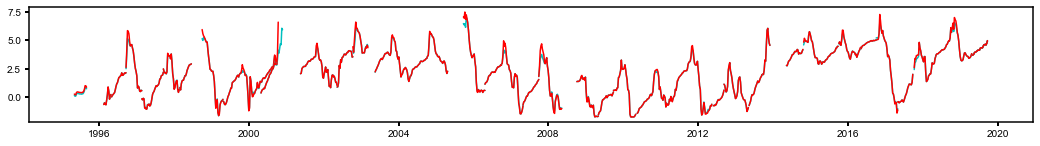

In [28]:
fig = plt.figure(1,figsize=(18,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
for dfn, df in dfs.items():
    print(f"plotting {dfn}")
    dft = df[(df.depth>=40) & (df.depth<=70)].resample('1W').mean()
    ax1.plot(dft.index, dft.temperature ,'c')
    dft = df[(df.depth>=40) & (df.depth<=55)].resample('1W').mean()
    ax1.plot(dft.index, dft.temperature ,'r')


In [42]:
### from netcdf files I gave Mike - try same thing
import xarray as xr
import os

In [92]:
path2nc = '/Users/bell/Downloads/M2_1995-2020/'
pd_temp= pd.DataFrame()
pd_sal= pd.DataFrame()

with os.scandir(path2nc) as it:
    for entry in it:
        if entry.name.endswith(".nc") and entry.is_file():
            try:
                xt = xr.load_dataset(entry.path)
                if ((xt.depth >= 40) & (xt.depth <=55)):
                    try:
                        pd_temp=pd.concat([pd_temp,xt.T_20[:,0,0,0].to_pandas()])
                    except:
                        print(f"{entry.name}: no temp")
                    try:
                        pd_sal=pd.concat([pd_sal,xt.S_41[:,0,0,0].to_pandas()])
                    except:
                        print(f"{entry.name}: no sal")
            except:
                print(entry.name)

11bs2c_mt_0046m.cf.nc: no sal
00bsm2a_mt_0050m.cf.nc: no sal
14bs2c_mt3267_0050m.cf.nc: no sal
10bs2c_s39_0048m.cf.nc: no sal
18bs2c_s39_0050m.cf.nc: no sal
97bs2b_mt_0054m.cf.nc: no sal
11bsm2a_s39_0050m.cf.nc: no sal
03bs2a_s39_0045m.cf.nc: no sal
12bsm2a_s39_0055m.cf.nc: no sal
04bs2c_s39_0040m.cf.nc: no sal
03bs2c_s39_0050m.cf.nc: no sal
14bsm2a_s39_0050m.cf.nc: no sal
10bs2c_mt_0043m.cf.nc: no sal
14bsm2a_mt4032_0055m.cf.nc: no sal
06bsm2a_s39_0050m.cf.nc: no sal
19bsm2a_s56_0055m.cf.nc: no sal
03bs2c_s39_0040m.cf.nc: no sal
04bs2c_s39_0050m.cf.nc: no sal
19bsm2a_s56_0047m.cf.nc: no sal
03bsm2a_s39_0050m.cf.nc: no sal
15bs2c_mt4016_0040m.cf.nc: no sal
16bsm2a_s56_0047m.cf.nc: no sal
16bsm2a_s56_0055m.cf.nc: no sal
01bs2b_mt_0054m.cf.nc: no sal
18bs2c_s39_0040m.cf.nc: no sal
09bsm2a_s39_0050m.cf.nc: no sal
10bsm2a_s39_0050m.cf.nc: no sal
12bs2c_s39_0050m.cf.nc: no sal
00bs2w_mt_0040m.cf.nc: no sal
15bsm2a_s39_0050m.cf.nc: no sal
99bs2c_mt_0040m.cf.nc: no sal
17bs2c_s39_0040m.cf.nc:

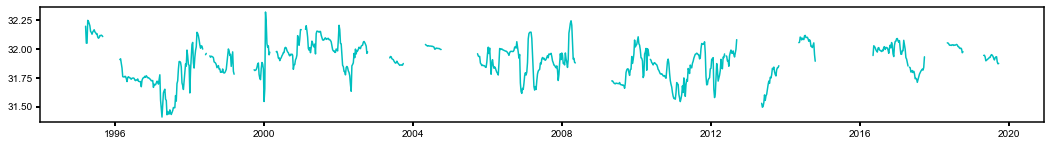

In [93]:
fig = plt.figure(1,figsize=(18,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

pd_sal[pd_sal>1e30]=np.nan
pd_salt = pd_sal.resample('1W').mean()
ax1.plot(pd_salt.index, pd_salt ,'c')



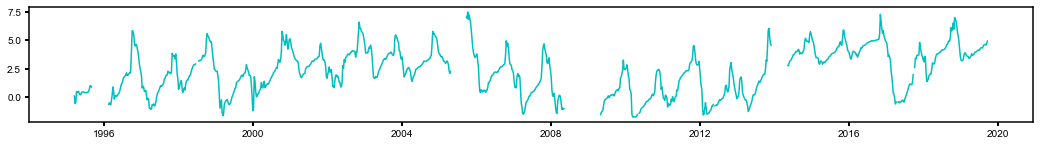

In [94]:
fig = plt.figure(1,figsize=(18,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

pd_temp[pd_temp>1e30]=np.nan
pd_tempt = pd_temp.resample('1W').mean()
ax1.plot(pd_tempt.index, pd_tempt ,'c')



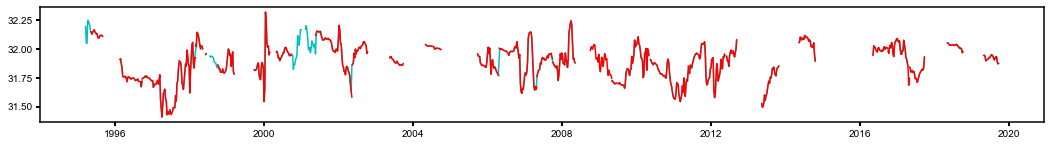

In [98]:
fig = plt.figure(1,figsize=(18,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

pd_sal[pd_sal>1e30]=np.nan
pd_salt = pd_sal.resample('1W').mean()
ax1.plot(pd_salt.index, pd_salt ,'c')

for dfn, df in dfs.items():
    dft = df[(df.depth>=40) & (df.depth<=55)].resample('1W').mean()
    ax1.plot(dft.index, dft.salinity ,'r')

    

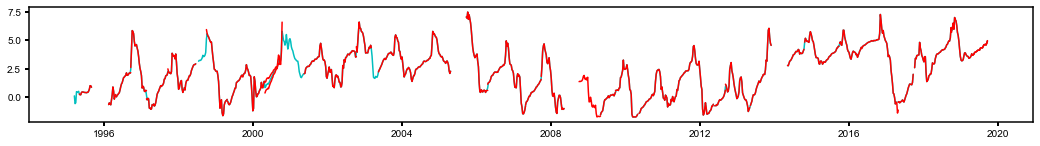

In [96]:
fig = plt.figure(1,figsize=(18,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

pd_temp[pd_temp>1e30]=np.nan
pd_tempt = pd_temp.resample('1W').mean()
ax1.plot(pd_tempt.index, pd_tempt ,'c')

for dfn, df in dfs.items():
    dft = df[(df.depth>=40) & (df.depth<=55)].resample('1W').mean()
    ax1.plot(dft.index, dft.temperature ,'r')
